# Problem 7.48 External flow

In [1]:
import numpy as np
from scipy.constants import convert_temperature
import matplotlib.pyplot as plt

from PIL import Image #para importar figuras
fig1 = Image.open('P7.48.png','r') 
TableA4 = Image.open('TableA.4.jpg','r') 
fig1.thumbnail(size=(700,700))

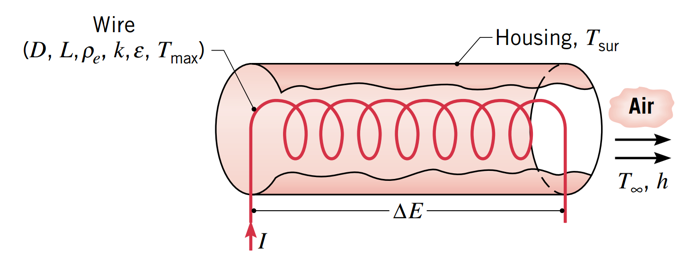

In [2]:
fig1

Consider the Nichrome wire ($D = 1$ mm, $ \rho_e = 10^-6$ Ωm , $k = 25$ W/mK, $ \epsilon= 0.20$) used to fabricate the air heater of Problem 3.86, but now under conditions for which the convection heat transfer coefficient must
be determined. 

(a) For atmospheric air $50 ^\circ{C}$ and a cross-flow velocity of $5$ m/s, what are the surface and centerline
temperatures of the wire when it carries a current of 25 A and the housing of the heater is also at $50 ^\circ{C}$?

(b) Explore the effect of variations in the flow velocity and electrical current on the surface and centerline
temperatures of the wire.

Note that the air properties appearing in the following equations are evaluated at the film temperature $T_f = (T_s + T_\infty)/2 $

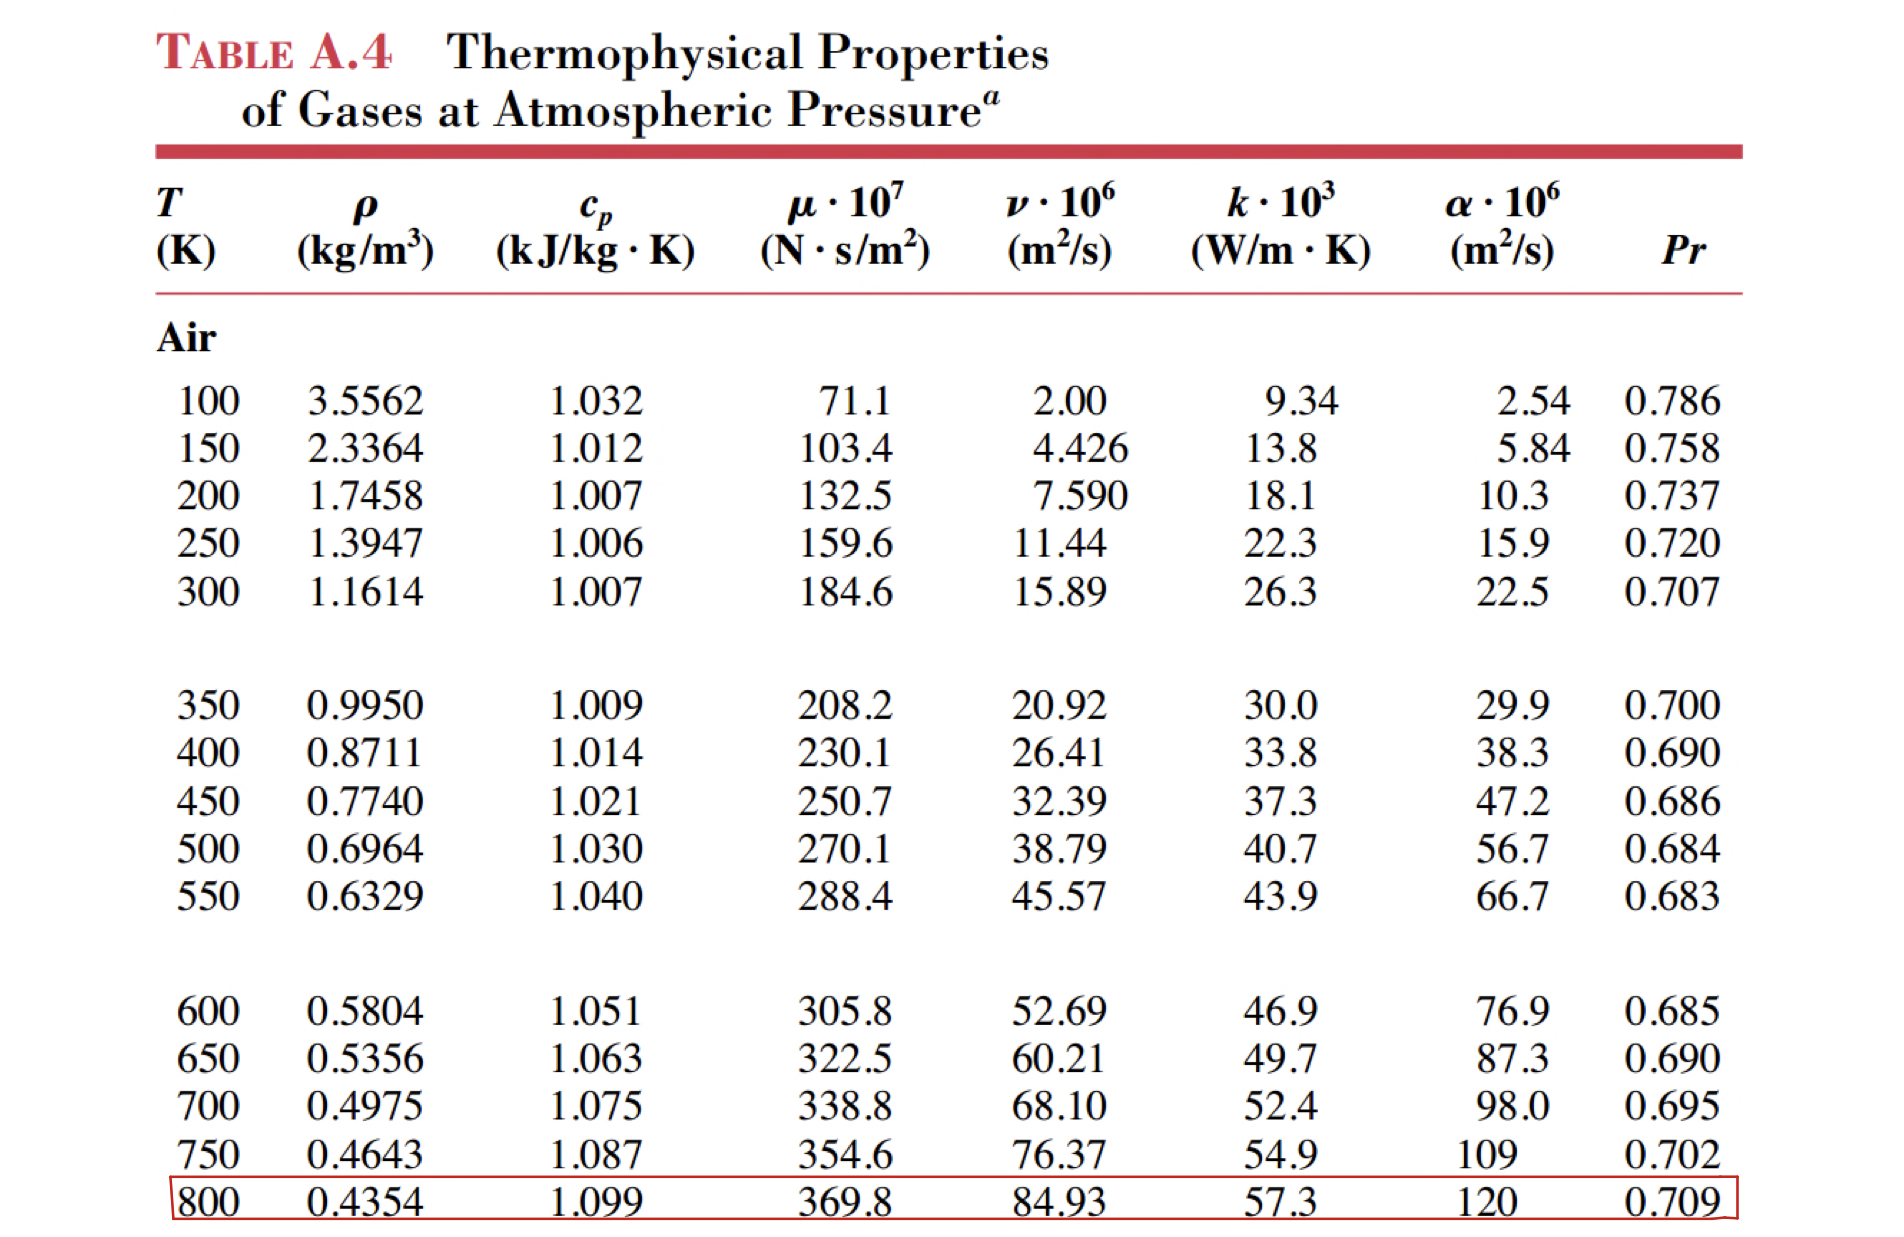

In [3]:
TableA4

The empirical correletion of Churchill and Bernstein  covers a wide range of Reynolds numbers $Re_D$ and Prandtl numers $Pr$. Mostly recommended for all $Re_D, Pr \geq 0.2$ and has the form

$$\bar{Nu_D} = 0.3 + \dfrac{0.62{Re_{D}}^{1/2}Pr^{1/3}}{[1+(0.4/Pr)^{2/3}]^{1/4}} \left[1+ \left(\dfrac{Re_D}{282,000} \right)^{5/8} \right]^{4/5}.$$

The convection heat transfer coeefficient can be calculated by the equation above and the followig expression

$$\bar{Nu_D} = \dfrac{\bar{h}D}{k}$$

In [4]:
k_nic   = 25
k_air   = 0.0573
D       = 0.001
v       = 5
nu      = 0.00008493
Pr      = 0.709

ReD     = (v*D)/nu #Reynolds number
I       = 25
R       = 10**-6
sigma   = 5.67*10**-8
epsilon = 0.2
Ti      = 323.15
Tsur    = 323.15
hc      = ((k_air)/(D))*(0.3 + (( 0.62*(ReD**(1/2.))*(Pr**(1/3.)))/(( 1 + ((0.4)/(Pr))**(2/3.))**(1/4.) ))*(1+ ((ReD)/(282000))**(5/8.) )**(4/5.))
print("The convection heat transfer coefficient is {}".format(hc))

The convection heat transfer coefficient is 231.45238556886233


In [5]:
q = ((I**2)*(R))/(((np.pi*(D**2))/4)**2)
print("The rate of heat transfer is {}".format(q))

The rate of heat transfer is 1013211836.423378


(a) For atmospheric air at $50 ^{\circ}$C  and a cross-flow velocity of $5$ m/s, what are the surface and centerline
temperatures of the wire when it carries a current of $25$ A and the housing of the heater is also at $50 ^{\circ}$C ?


$$h_r = \sigma \epsilon (T_s + T_{sur})(T_s^2+T_{sur}^2)$$

In [6]:
hr = np.linspace(0,70,20)
Ts = (Ti) + ((q*(D/2))/(2*(hc+hr)))
hr = epsilon*sigma*(Ts+Tsur)*((Ts**2)+(Tsur**2))
Ts = np.mean(Ts)
Ts_c = convert_temperature(Ts,'Kelvin','Celsius')
print("The surface temperature, Ts = {} K = {} °C".format(Ts,Ts_c))

The surface temperature, Ts = 1279.9129883047906 K = 1006.7629883047906 °C


In [7]:
To = ((q*((D/2)**2))/(4*k_nic)) + Ts
To
To_c = convert_temperature(To,'Kelvin','Celsius')
print("The center line temperature To = {} K and {} °C".format(To,To_c))

The center line temperature To = 1282.446017895849 K and 1009.2960178958491 °C


(b) Explore the effect of variations in the flow velocity $V$ on the surface and centerline temperatures of the wire.

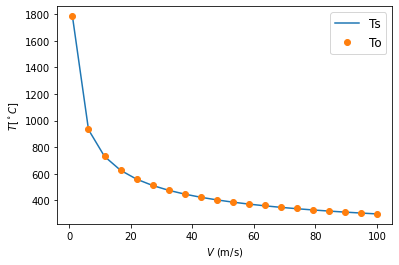

In [8]:
k       = 0.057
kf      = 25
D       = 0.001
nu      = 0.00008493
V       = np.linspace(1.05,100,20)
ReD     = (V*D)/(nu)
Pr      = 0.709
I       = 25
R       = 10**-6
sigma   = 5.67*10**-8
epsilon = 0.2
Ti      =  323.15
Tsur    = 323.15
hc      = (k/D)*(0.3 + (( 0.62*(ReD**(1/2.))*(Pr**(1/3.)))/(( 1 + ((0.4)/(Pr))**(2/3.))**(1/4.) ))*(1+ ((ReD)/(282000))**(5/8.) )**(4/5.))
q  = ((I**2)*(R))/(((np.pi*(D**2))/4)**2)
hr = np.linspace(30,50,20)
hr = epsilon*sigma*(Ts+Tsur)*((Ts**2)+(Tsur**2))

Ts  = (Ti) + ((q*(D/2))/(2*(hc+hr)))
To  = ((q*((D/2)**2))/(4*k_nic)) + Ts
Tsc = Ts-273
Toc = To-273
plt.plot(V,Tsc,label="Ts")
plt.plot(V,Toc,"o",label ="To")
plt.xlabel("$V$ (m/s)")
plt.ylabel("$T [^\circ{C}]$")
plt.legend(fontsize=12)
plt.show()

In [9]:
Toc-Tsc

array([2.53302959, 2.53302959, 2.53302959, 2.53302959, 2.53302959,
       2.53302959, 2.53302959, 2.53302959, 2.53302959, 2.53302959,
       2.53302959, 2.53302959, 2.53302959, 2.53302959, 2.53302959,
       2.53302959, 2.53302959, 2.53302959, 2.53302959, 2.53302959])

In [10]:
Tsc

array([1782.6228499 ,  931.60124934,  730.31209559,  626.17678397,
        559.45103704,  511.87765693,  475.6889271 ,  446.9308614 ,
        423.34569912,  403.53605805,  386.58369285,  371.85657695,
        358.90328898,  347.39150215,  337.07032016,  327.74623984,
        319.2672666 ,  311.51210057,  304.38258315,  297.79830122])

 Explore the effect of variations in electrical current $I$ on the surface and centerline temperatures of the wire.

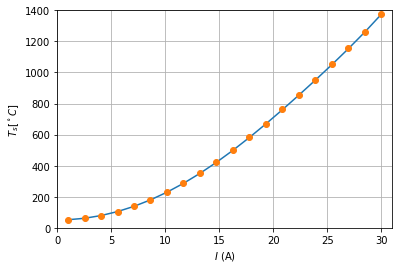

In [17]:
k       = 0.057
kf      = 25
D       = 0.001
nu      = 0.00008493
V       = 5
ReD     = (V*D)/(nu)
Pr      = 0.709
I       = np.linspace(1,30,20)
R       = 10**-6
sigma   = 5.67*10**-8
epsilon = 0.2
Ti      =  323.15
Tsur    = 323.15
hc      = (k/D)*(0.3 + (( 0.62*(ReD**(1/2.))*(Pr**(1/3.)))/(( 1 + ((0.4)/(Pr))**(2/3.))**(1/4.) ))*(1+ ((ReD)/(282000))**(5/8.) )**(4/5.))
q = ((I**2)*(R))/(((np.pi*(D**2))/4)**2)
hr = np.linspace(30,50,20)
hr = epsilon*sigma*(Ts+Tsur)*((Ts**2)+(Tsur**2))
Ts = (Ti) + ((q*(D/2))/(2*(hc+hr)))
To = ((q*((D/2)**2))/(4*k_nic)) + Ts
Tsc = Ts-273
Toc  = To-273
plt.plot(I,Tsc)
plt.plot(I,Toc, "o")
plt.ylim(0,1400)
plt.xlim(0,31)
plt.grid()
plt.xlabel("$I$ (A)")
plt.ylabel("$T_s [^\circ{C}]$")
plt.show()

In [18]:
To-Ts

array([0.00405285, 0.02586637, 0.06656325, 0.12614347, 0.20460704,
       0.30195397, 0.41818424, 0.55329786, 0.70729484, 0.88017516,
       1.07193883, 1.28258585, 1.51211622, 1.76052994, 2.02782701,
       2.31400743, 2.6190712 , 2.94301832, 3.28584879, 3.64756261])

In [19]:
Tsc

array([  51.89854683,   61.30639663,   78.8426015 ,  104.47479595,
        138.14627609,  179.76433561,  229.18351837,  286.18357685,
        350.44327188,  421.5136915 ,  498.79867247,  581.55469863,
        668.92657276,  760.03483686,  854.1221902 ,  950.74693463,
       1049.98580328, 1152.58813401, 1260.02246085, 1374.38121721])